In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [144]:
data = pd.read_csv('ex2data2.txt', header=None)

In [145]:
data.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [146]:
X = data.iloc[:,0:2]

In [147]:
y = data.iloc[:,2]

In [148]:
m  = len(X)

In [149]:
mask = y == 1

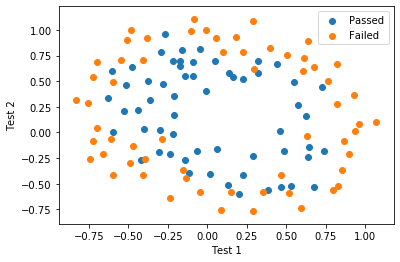

In [150]:
test_pass = plt.scatter(X[mask][0], X[mask][1])
test_fail = plt.scatter(X[~mask][0], X[~mask][1])
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend((test_pass, test_fail), ('Passed', 'Failed'))
plt.show()

In [151]:
def featureMapping(X1, X2):
    out = np.ones(X.shape[0])[:,np.newaxis]
    degree = 6
    for i in range(degree+1):
        for j in range(degree + 1 - i):
            if i == 0 and j == 0:
                continue
            out = np.hstack((out, np.multiply(np.power(X1, i), np.power(X2, j))[:,np.newaxis]))
    return out

In [152]:
X = featureMapping(X.iloc[:,0], X.iloc[:,1])

In [153]:
y = y[:,np.newaxis]

In [154]:
(m,n) = X.shape

In [155]:
theta = np.zeros((n, 1))

In [156]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [157]:
def computeCost(theta, X, y, lambda_t):
    temp = sigmoid(np.dot(X, theta))
    temp = (- 1 / m) * np.sum(np.multiply(y, np.log(temp)) + np.multiply(1 - y, np.log(1 - temp)))
    reg = (lambda_t / 2 * m) * np.sum(np.power(theta[1:], 2))
    return temp + reg

In [158]:
computeCost(theta, X, y, 1000)

0.6931471805599454

In [159]:
def gradientFunction(theta, X, y, lambda_t):
    temp = sigmoid(np.dot(X, theta)) - y
    grad = np.zeros((m,1))
    grad = (1/m) * np.dot(X.T, temp)
    grad[1:] = grad[1:] + (lambda_t / m) * theta[1:]
    return grad

In [160]:
lmbda = 1

In [161]:
output = opt.fmin_tnc(func=computeCost, x0=theta.flatten(), fprime=gradientFunction, args=(X, y.flatten(), lmbda))

In [162]:
theta = output[0]

In [163]:
def accuracy(X, y, theta):
    pred = np.dot(X, theta) >= 0
    percent = np.mean(y == pred) * 100
    return percent

In [164]:
accuracy(X, y, theta)

49.91381786842861

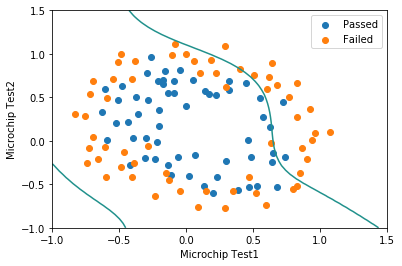

In [165]:
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))
def mapFeatureForPlotting(X1, X2):
    degree = 6
    out = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))))
    return out
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(mapFeatureForPlotting(u[i], v[j]), theta)
mask = y.flatten() == 1
X = data.iloc[:,:-1]
passed = plt.scatter(X[mask][0], X[mask][1])
failed = plt.scatter(X[~mask][0], X[~mask][1])
plt.contour(u,v,z,0)
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()

In [166]:
np.ones((3,1))

array([[1.],
       [1.],
       [1.]])

In [167]:
np.power(np.ones((3,1))[1:], 2)

array([[1.],
       [1.]])

In [168]:
np.sum(np.power(np.ones((3,1))[1:], 2))

2.0